<a href="https://colab.research.google.com/github/pizzaguy21/ML-DL-CV-NLP/blob/main/535230038_Clustering_UAS_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.metrics import silhouette_samples as sk_silhouette_samples
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import math
import time

In [ ]:
path = '/content/drive/MyDrive/Format Data Pertanian Indonesia (2).xlsx'
df = pd.read_excel(path, sheet_name='Gabungan')
df.set_index('Nama Kota', inplace=True)
df.head()

,Luas Panen 2011,Luas Panen 2012,Luas Panen 2013,Luas Panen 2014,Luas Panen 2015,Luas Panen 2016,Luas Panen 2017,Luas Panen 2018,Luas Panen 2019,Luas Panen 2020,...,Produktivitas 2013,Produktivitas 2014,Produktivitas 2015,Produktivitas 2016,Produktivitas 2017,Produktivitas 2018,Produktivitas 2019,Produktivitas 2020,Produktivitas 2021,Produktivitas 2022
Nama Kota,,,,,,,,,,,,,,,,,,,,,
1101 - Kab. Simeulue,0.0,0,0,8.20,4.15,5.72,6.79,7.24,6.80,4.03,...,0,44.634146,419.277108,333.916084,480.117820,0,0,0,0,0
1102 - Kab. Aceh Singkil,0.0,0,0,53.41,30.51,15.15,10.40,7.46,19.56,13.00,...,0,67.365662,488.692232,1359.735974,526.923077,0,0,0,0,0
1103 - Kab. Aceh Selatan,0.0,0,0,275.68,231.88,279.65,552.38,279.08,290.88,235.40,...,0,110.864045,1371.097119,1834.328625,1665.574423,0,0,0,0,0
1104 - Kab. Aceh Tenggara,0.0,0,0,3.22,4.49,12.22,6.96,1.61,24.54,159.30,...,0,145.962733,826.280624,1764.320786,3554.597701,0,0,0,0,0
1105 - Kab. Aceh Timur,0.0,0,0,140.10,280.32,319.15,0.20,349.66,165.05,317.61,...,0,79.379015,799.122431,864.922450,500.000000,0,0,0,0,0


In [ ]:
def visualize_silhouette(X, cluster_labels, cntr, algo):
  n_clusters = len(np.unique(cluster_labels))

  fig, (ax1, ax2) = plt.subplots(1, 2)
  fig.set_size_inches(18, 7)

  ax1.set_xlim([-0.1, 1])
  ax1.set_ylim(0, len(X) + (n_clusters + 1) * 10)

  silhouette_avg = silhouette_score(X, cluster_labels)
  result_kmeans['Rata-rata Silhouette'].append(silhouette_avg)
  print("For n_clusters =", n_clusters,
        "The average silhouette_score is :", silhouette_avg)

  sample_silhouette_values = sk_silhouette_samples(X, cluster_labels)

  y_lower = 10

  for i in range(n_clusters):
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)

    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

  ax1.set_title("The silhouette plot for the various clusters.")
  ax1.set_xlabel("The silhouette coefficient values")
  ax1.set_ylabel("Cluster label")

  ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
  ax1.set_yticks([])
  ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

  colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)

  X = X.to_numpy()
  scaler = StandardScaler()
  X = scaler.fit_transform(X)
  pca = PCA(n_components=2)
  X = pca.fit_transform(X)

  ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
              c=colors, edgecolor='k')

  centers = cntr
  centers = scaler.transform(cntr)
  centers = pca.transform(centers)

  ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
              c="white", alpha=1, s=200, edgecolor='k')

  for i, c in enumerate(centers):
    ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                s=50, edgecolor='k')

  ax2.set_title("The visualization of the clustered data.")
  ax2.set_xlabel("Feature space for the 1st feature")
  ax2.set_ylabel("Feature space for the 2nd feature")

  plt.suptitle((f"Silhouette analysis for {algo} clustering on sample data "
                "with n_clusters = %d" % n_clusters),
               fontsize=14, fontweight='bold')

  plt.show()

In [ ]:
def handle_outliers(X, z_threshold=3):
    """Remove or cap outliers based on z-score"""
    X_clean = X.copy()
    z_scores = np.abs((X_clean - X_clean.mean()) / X_clean.std())
    outliers = (z_scores > z_threshold).any(axis=1)
    print(f"Detected {outliers.sum()} outliers out of {len(X_clean)} data points")

    X_without_outliers = X_clean[~outliers]

    X_capped = X_clean.copy()
    for col in X_capped.columns:
        mean, std = X_capped[col].mean(), X_capped[col].std()
        X_capped[col] = X_capped[col].clip(
            lower=mean - z_threshold * std,
            upper=mean + z_threshold * std
        )

    return X_capped

In [ ]:
X = df.copy()
for col in X.select_dtypes(include=['object']).columns:
  X[col] = X[col].str.replace(',', '.').astype(float)
X.replace(0, np.nan, inplace=True)
X = X[X.isna().mean(axis=1) < 0.4].copy()
city_names = X.index
X = X.reset_index(drop=True)
X = X.interpolate(method='linear', axis=0, limit_direction='both')
X.index = city_names

In [ ]:
# Buang kolom yang seluruhnya NaN
X = X.dropna(axis=1, how='all')

# Lanjutkan imputasi
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_clean = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)


Execution time for k=2 0.0059
Davies-Bouldin index for k=2 is  1.0004498013496537
For n_clusters = 2 The average silhouette_score is : 0.664526765364606


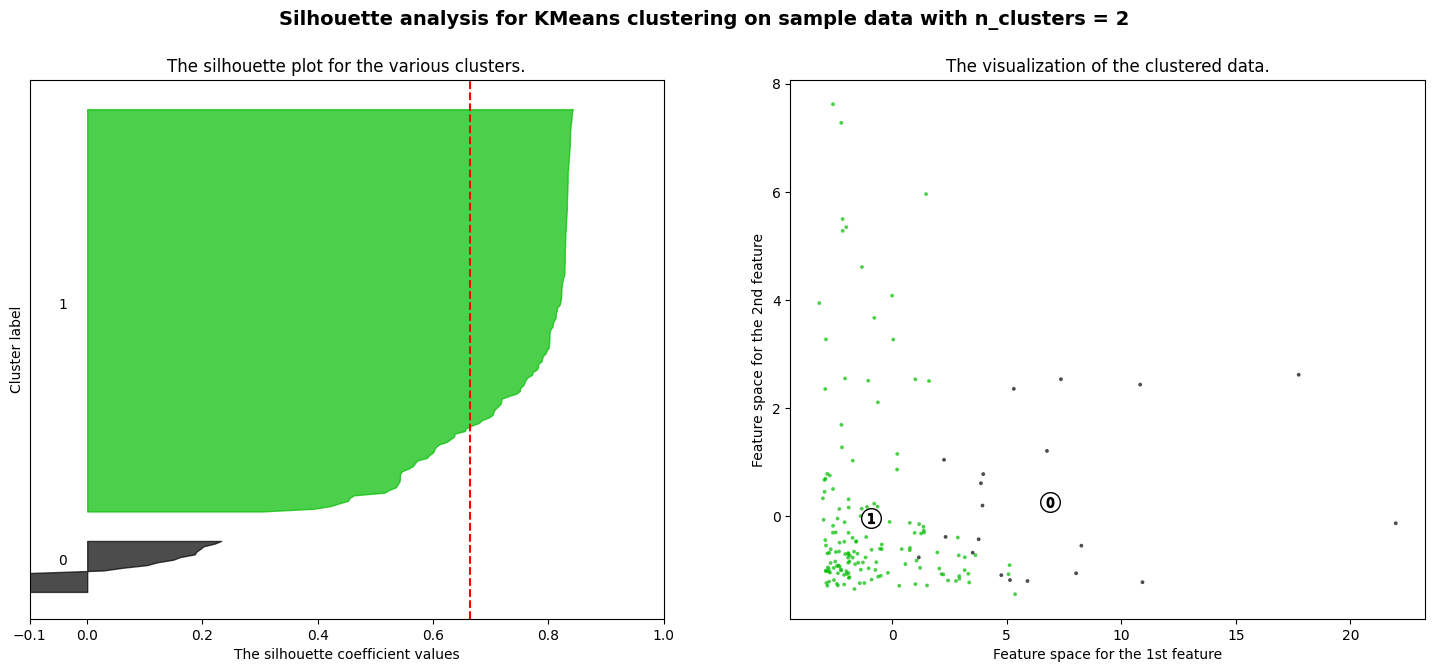



Execution time for k=3 0.0077
Davies-Bouldin index for k=3 is  1.1473461290841727
For n_clusters = 3 The average silhouette_score is : 0.4771151209593901


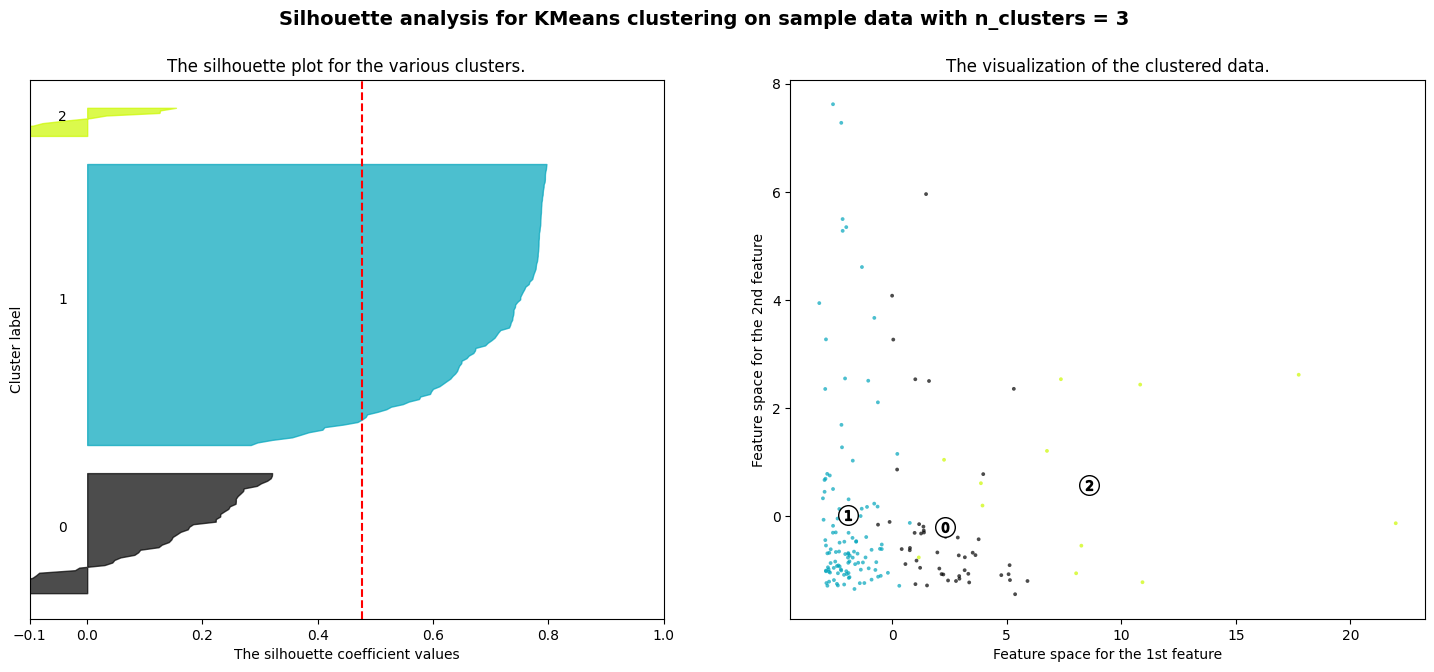



Execution time for k=4 0.0046
Davies-Bouldin index for k=4 is  1.0737529987199443
For n_clusters = 4 The average silhouette_score is : 0.4841009799282825


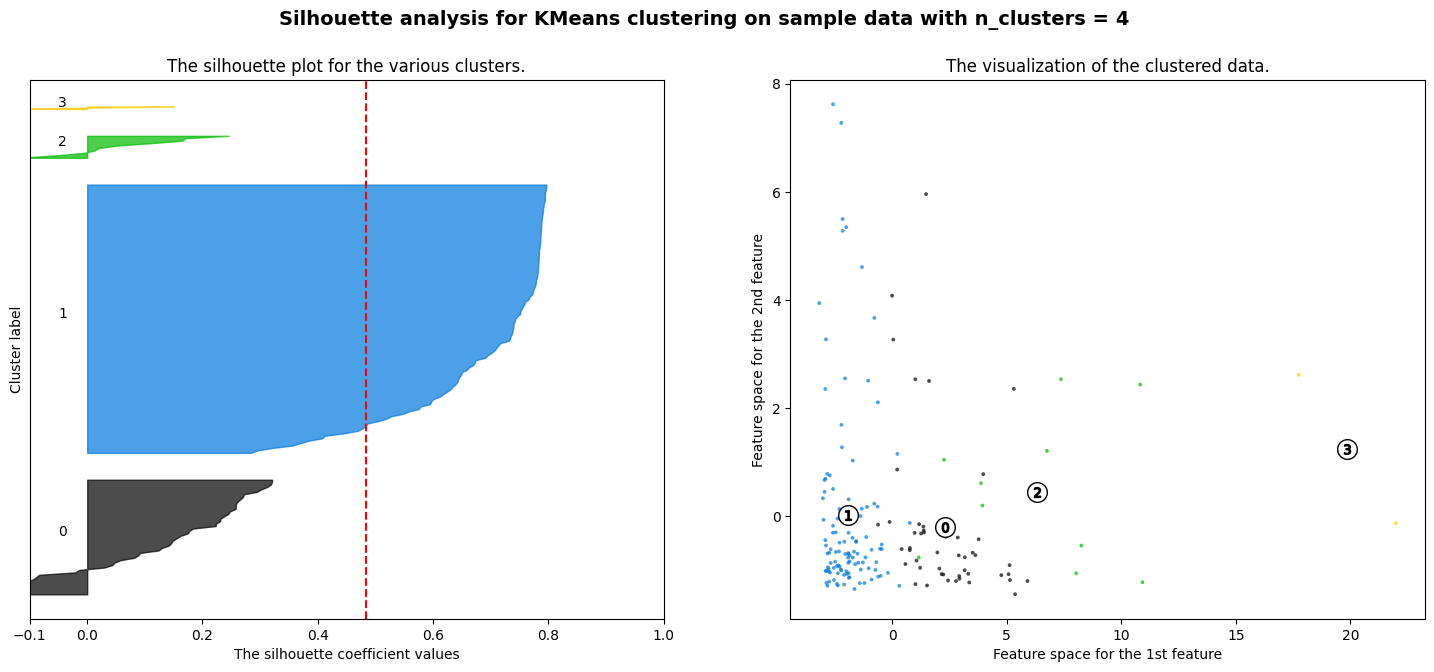



Execution time for k=5 0.0049
Davies-Bouldin index for k=5 is  0.909790129274319
For n_clusters = 5 The average silhouette_score is : 0.48842101438437274


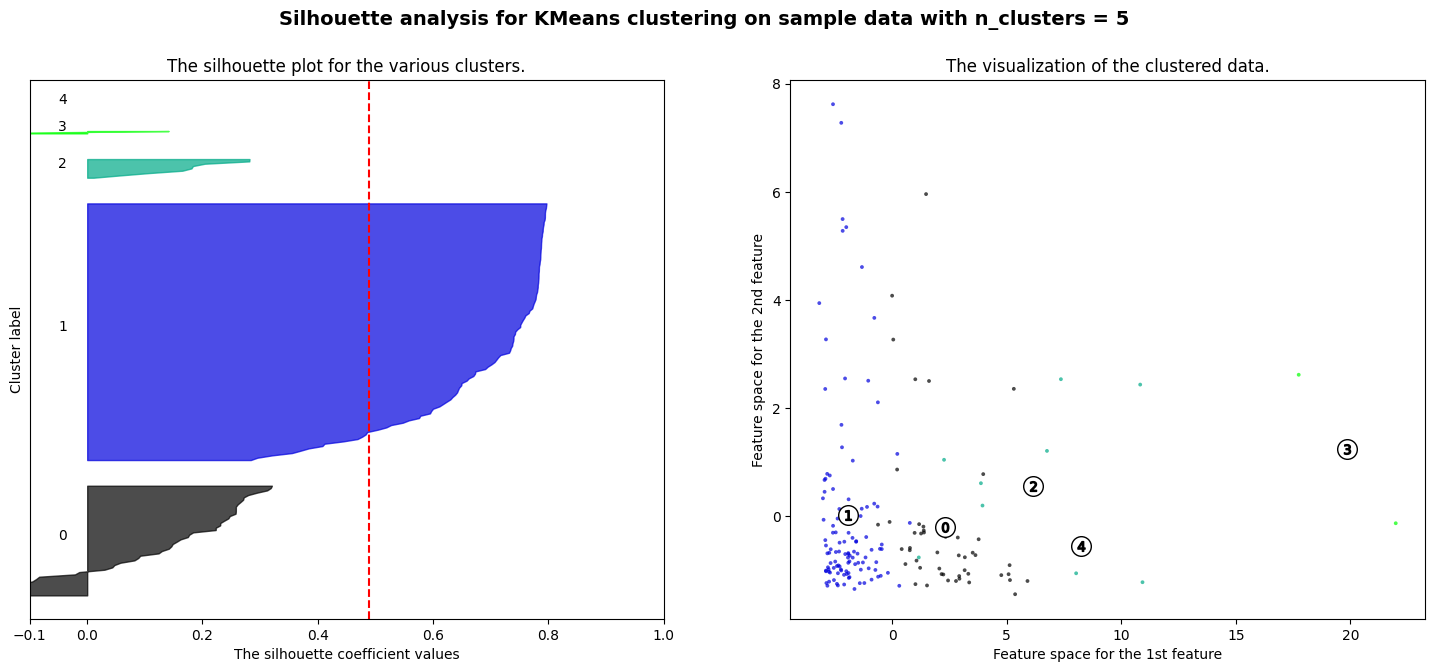



Execution time for k=6 0.0124
Davies-Bouldin index for k=6 is  0.6826019353448364
For n_clusters = 6 The average silhouette_score is : 0.48829810030183834


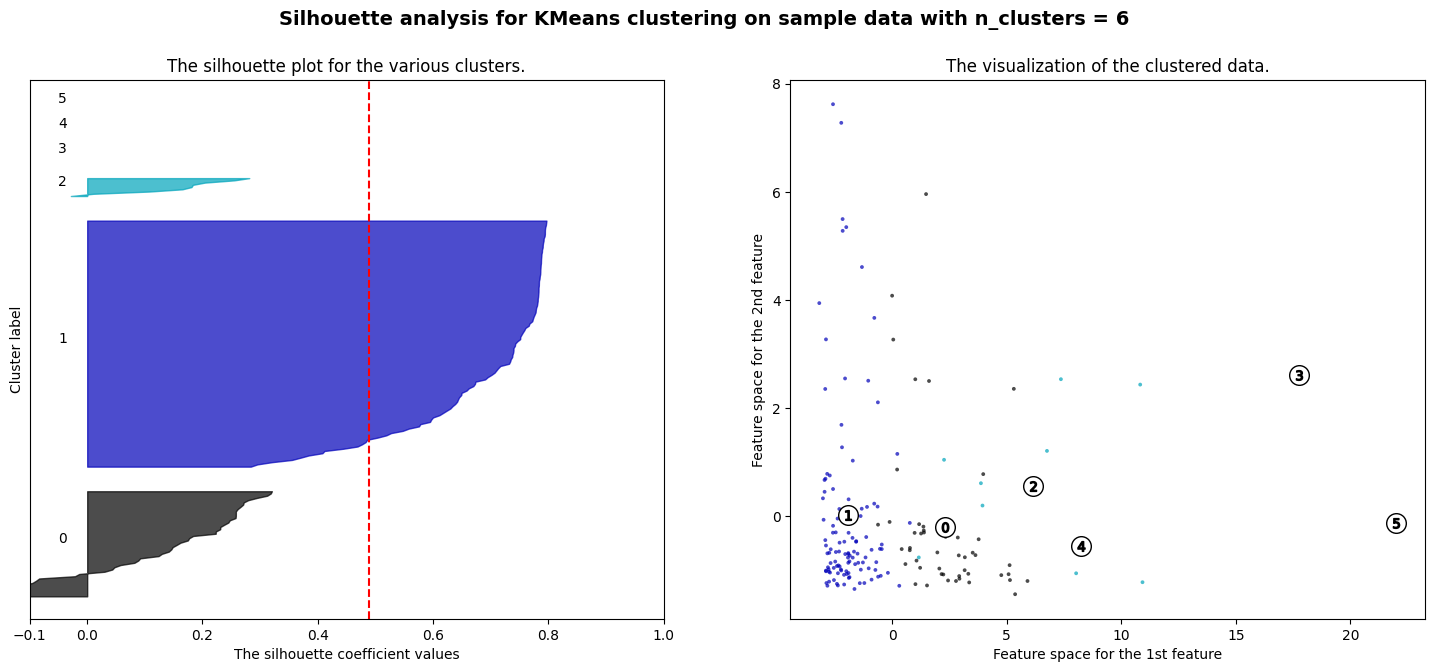



Execution time for k=7 0.0121
Davies-Bouldin index for k=7 is  0.852109859101261
For n_clusters = 7 The average silhouette_score is : 0.4800964098139715


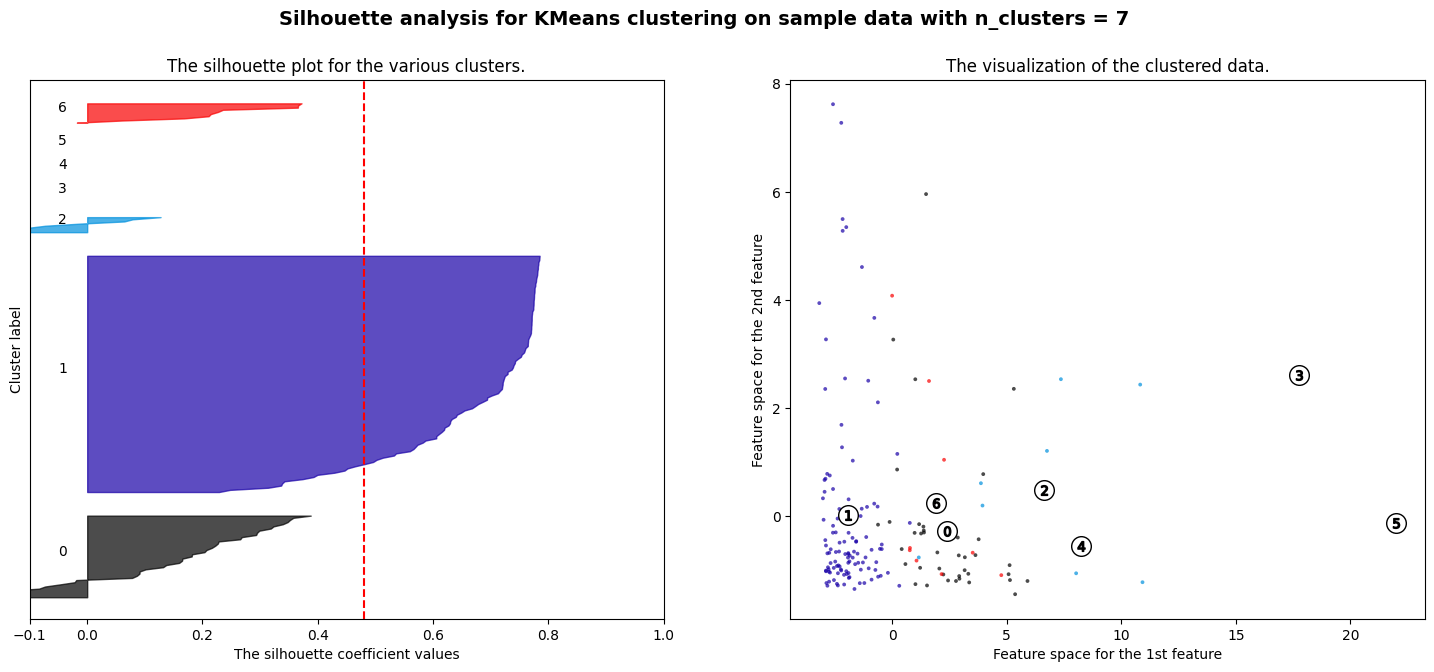



Execution time for k=8 0.0068
Davies-Bouldin index for k=8 is  1.054811118814571
For n_clusters = 8 The average silhouette_score is : 0.39255976753230065


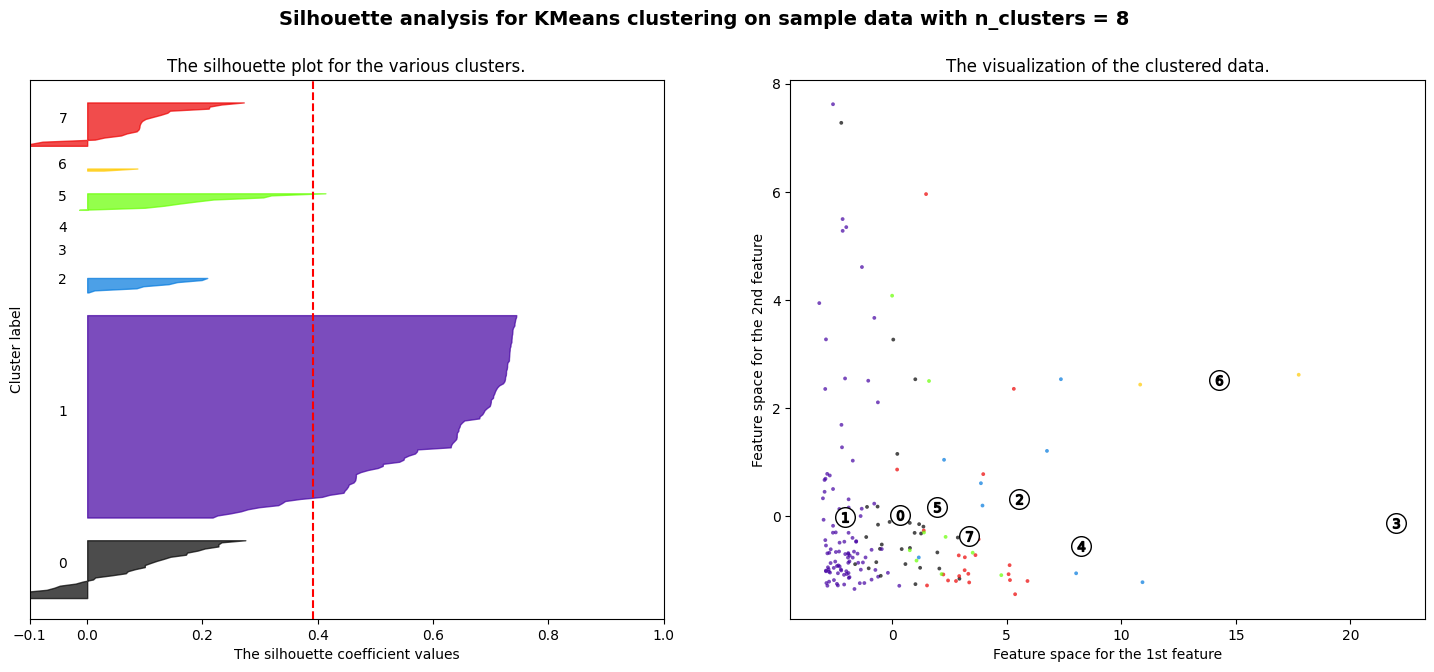



Execution time for k=9 0.0069
Davies-Bouldin index for k=9 is  1.1013526622425387
For n_clusters = 9 The average silhouette_score is : 0.39024417129819927


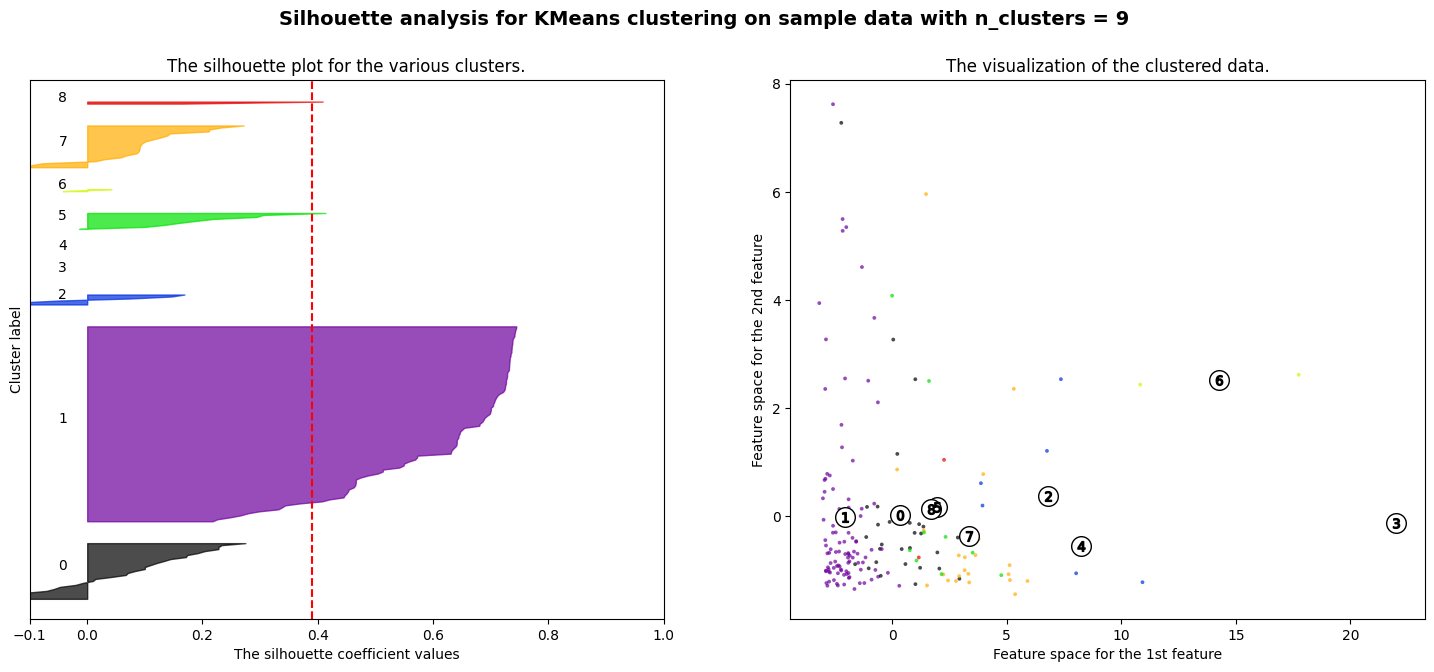



Execution time for k=10 0.0085
Davies-Bouldin index for k=10 is  0.9280837086747902
For n_clusters = 10 The average silhouette_score is : 0.3902479676899594


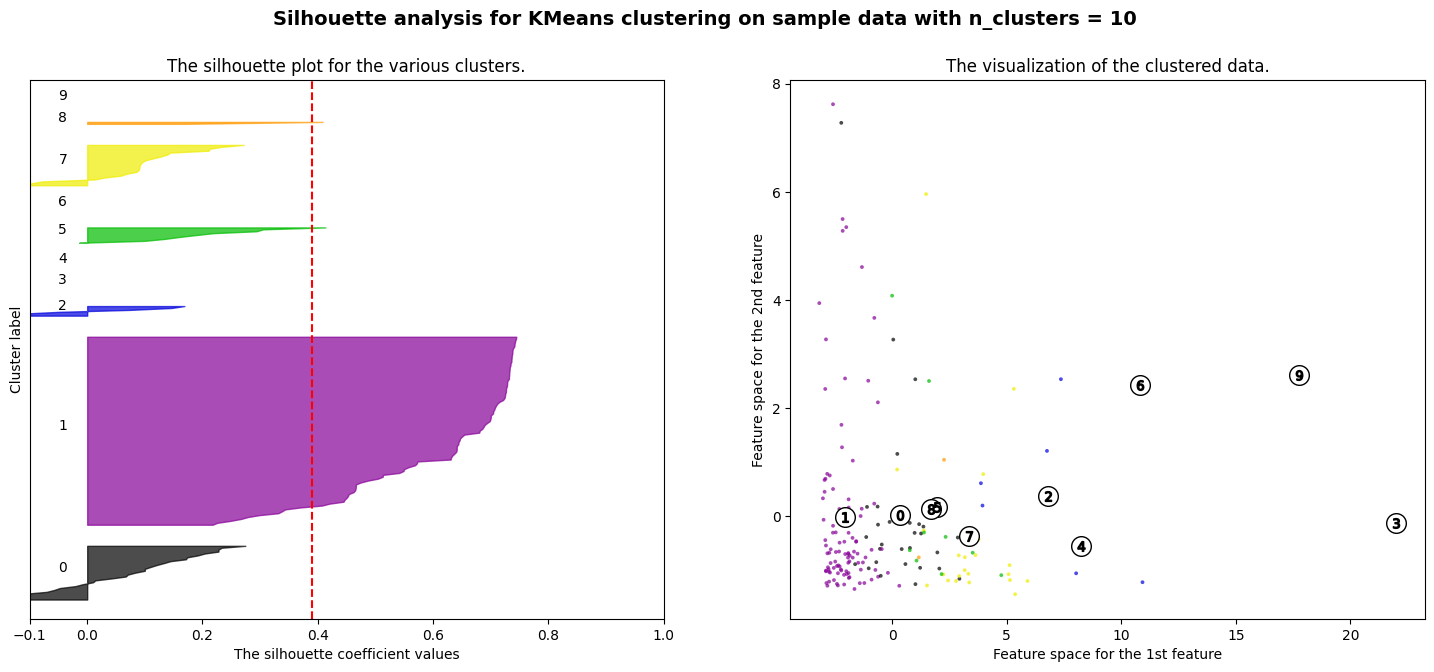

In [ ]:
X_new = X.copy()
result_kmeans = {
    'Jumlah Klaster': [],
    'Waktu Komputasi (detik)': [],
    'Rata-rata Davies-Bouldin Index': [],
    'Rata-rata Silhouette': []
}

for i in range(2, 11):
  start_time = time.time()
  clusterer = KMeans(n_clusters=i, random_state=10)
  cluster_labels = clusterer.fit_predict(X)
  end_time = time.time()
  X_new[f"cluster {i}"] = cluster_labels

  execution_time = end_time - start_time
  dbi = davies_bouldin_score(X, cluster_labels)
  result_kmeans['Waktu Komputasi (detik)'].append(execution_time)
  result_kmeans['Rata-rata Davies-Bouldin Index'].append(dbi)

  print(f"Execution time for k={i} {execution_time:.4f}")
  print(f"Davies-Bouldin index for k={i} is ", dbi)
  visualize_silhouette(X, cluster_labels, clusterer.cluster_centers_, 'KMeans')
  print('\n')

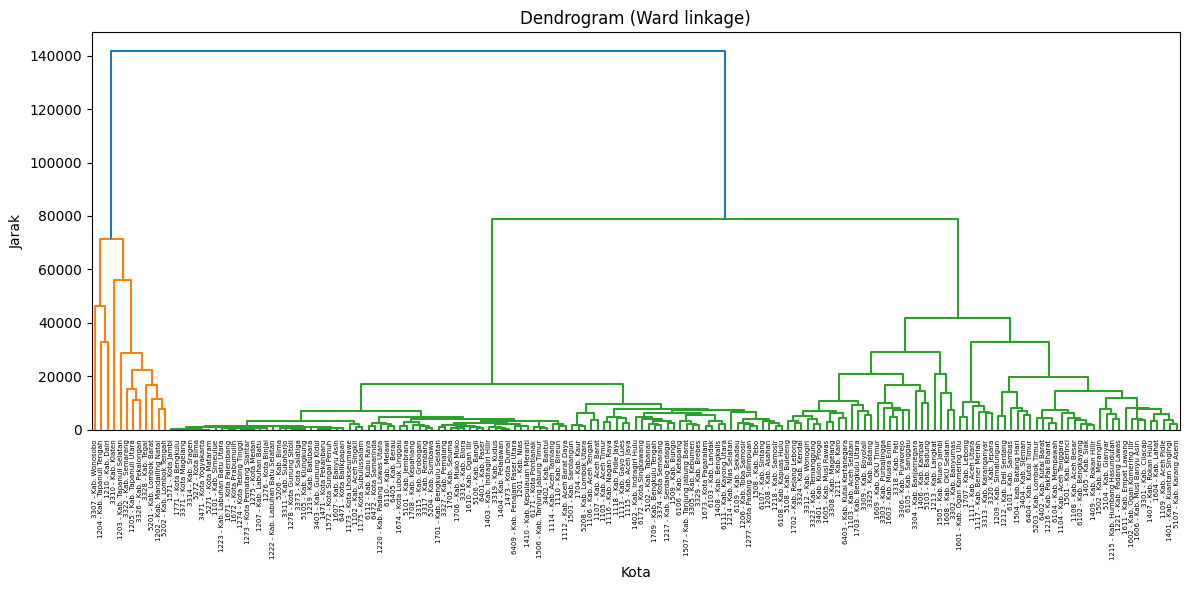

n_clusters=2
Silhouette Score: 0.7158620041763175
Davies-Bouldin Index: 0.90544156217611
Execution Time: 0.0036 detik


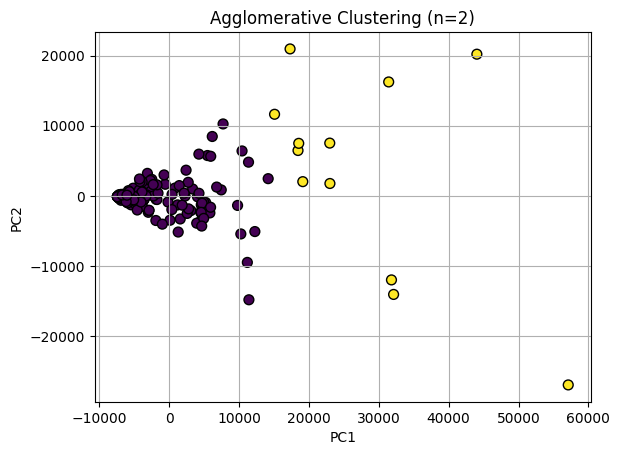

n_clusters=3
Silhouette Score: 0.4223087031719994
Davies-Bouldin Index: 1.117214059306427
Execution Time: 0.0046 detik


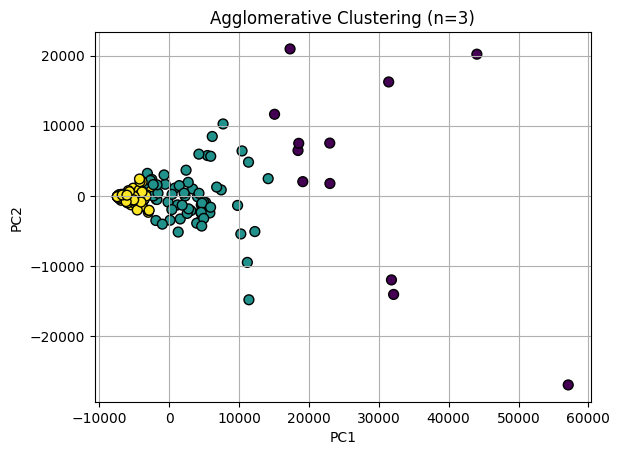

n_clusters=4
Silhouette Score: 0.432908468841935
Davies-Bouldin Index: 1.0785262782177654
Execution Time: 0.0036 detik


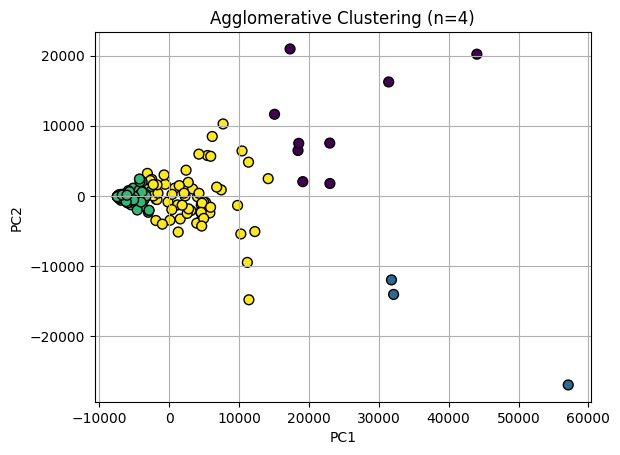

n_clusters=5
Silhouette Score: 0.436227004006206
Davies-Bouldin Index: 0.903093775556069
Execution Time: 0.0036 detik


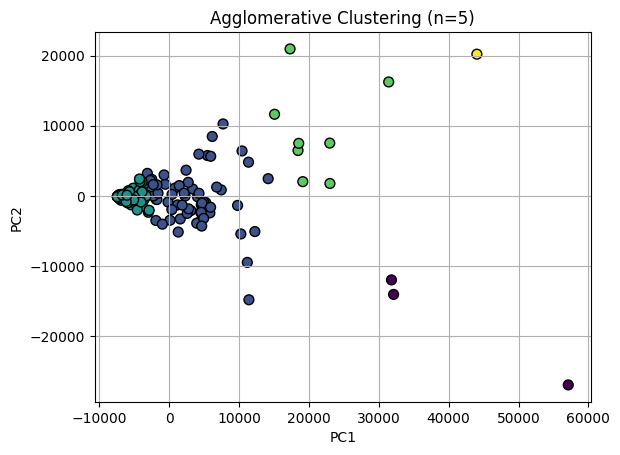

n_clusters=6
Silhouette Score: 0.4365602881506416
Davies-Bouldin Index: 0.7855051250112156
Execution Time: 0.0042 detik


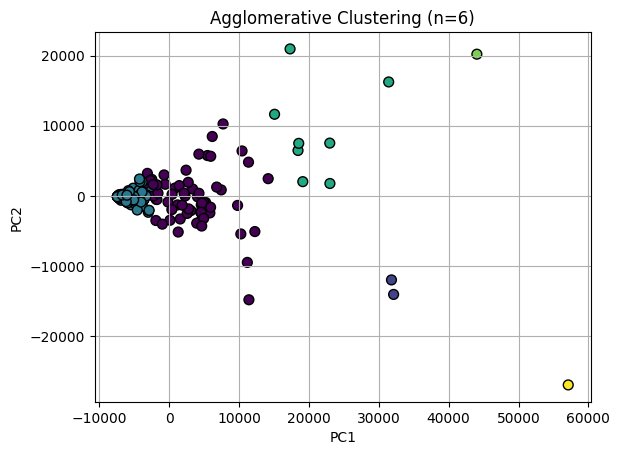

n_clusters=7
Silhouette Score: 0.4039211040972298
Davies-Bouldin Index: 1.035405444453278
Execution Time: 0.0040 detik


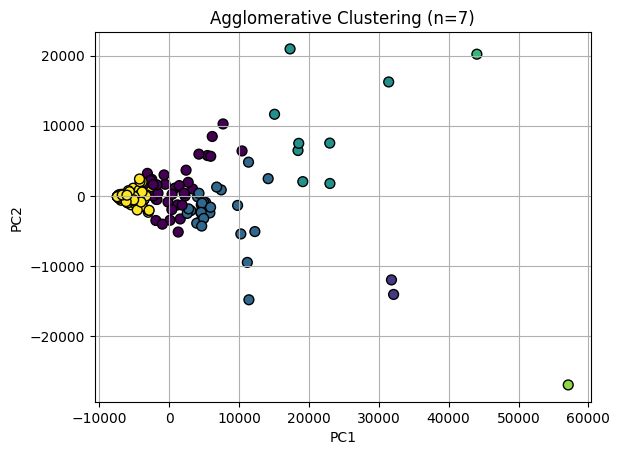

n_clusters=8
Silhouette Score: 0.3799399817996968
Davies-Bouldin Index: 1.006920475190576
Execution Time: 0.0042 detik


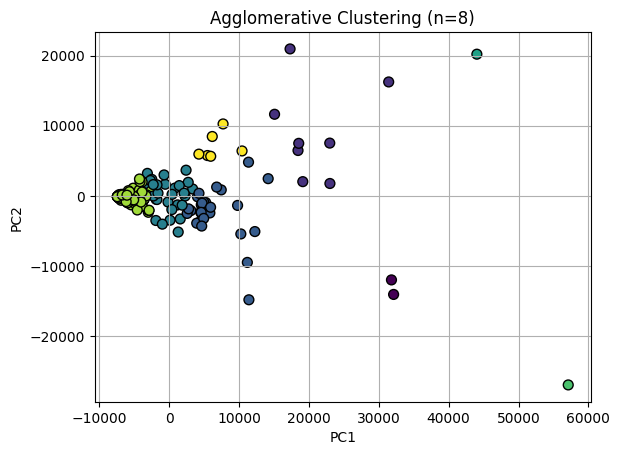

n_clusters=9
Silhouette Score: 0.37926480152709613
Davies-Bouldin Index: 0.8316108144769221
Execution Time: 0.0039 detik


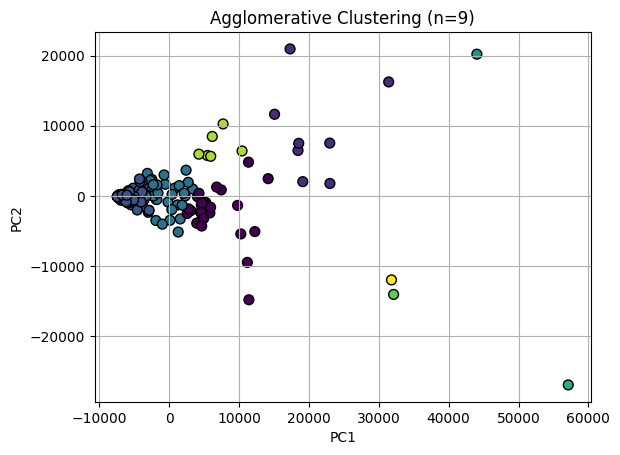

n_clusters=10
Silhouette Score: 0.38684932598786326
Davies-Bouldin Index: 0.8894916812430521
Execution Time: 0.0036 detik


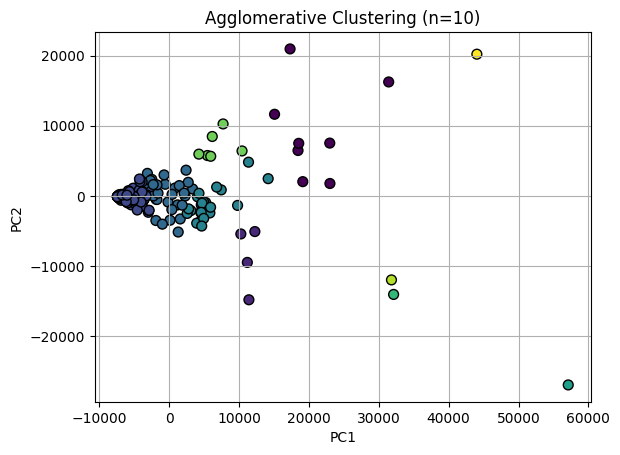

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Visualisasi dendrogram
linked = linkage(X, method='ward')
plt.figure(figsize=(12, 6))
dendrogram(linked, labels=city_names.to_list(), leaf_rotation=90)
plt.title("Dendrogram (Ward linkage)")
plt.xlabel("Kota")
plt.ylabel("Jarak")
plt.tight_layout()
plt.show()

# Agglomerative Clustering dan evaluasi
result_hc = {'Rata-rata Silhouette':[], 'Rata-rata Davies-Bouldin Index':[], 'Waktu Komputasi (detik)':[]}

for i in range(2, 11):
    start_time = time.time()
    clusterer = AgglomerativeClustering(n_clusters=i)
    cluster_labels = clusterer.fit_predict(X)
    end_time = time.time()

    silhouette_avg = silhouette_score(X, cluster_labels)
    dbi = davies_bouldin_score(X, cluster_labels)
    execution_time = end_time - start_time

    result_hc['Rata-rata Silhouette'].append(silhouette_avg)
    result_hc['Rata-rata Davies-Bouldin Index'].append(dbi)
    result_hc['Waktu Komputasi (detik)'].append(execution_time)

    print(f"n_clusters={i}")
    print(f"Silhouette Score: {silhouette_avg}")
    print(f"Davies-Bouldin Index: {dbi}")
    print(f"Execution Time: {execution_time:.4f} detik")

    # Visualisasi hasil clustering
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', edgecolor='k', s=50)
    plt.title(f"Agglomerative Clustering (n={i})")
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.grid(True)
    plt.show()

In [ ]:
path = '/content/drive/MyDrive/Format Data Pertanian Indonesia (2).xlsx'
df = pd.read_excel(path, sheet_name='Gabungan')
df.set_index('Nama Kota', inplace=True)
df.head()

,Luas Panen 2011,Luas Panen 2012,Luas Panen 2013,Luas Panen 2014,Luas Panen 2015,Luas Panen 2016,Luas Panen 2017,Luas Panen 2018,Luas Panen 2019,Luas Panen 2020,...,Produktivitas 2013,Produktivitas 2014,Produktivitas 2015,Produktivitas 2016,Produktivitas 2017,Produktivitas 2018,Produktivitas 2019,Produktivitas 2020,Produktivitas 2021,Produktivitas 2022
Nama Kota,,,,,,,,,,,,,,,,,,,,,
1101 - Kab. Simeulue,0.0,0,0,8.20,4.15,5.72,6.79,7.24,6.80,4.03,...,0,44.634146,419.277108,333.916084,480.117820,0,0,0,0,0
1102 - Kab. Aceh Singkil,0.0,0,0,53.41,30.51,15.15,10.40,7.46,19.56,13.00,...,0,67.365662,488.692232,1359.735974,526.923077,0,0,0,0,0
1103 - Kab. Aceh Selatan,0.0,0,0,275.68,231.88,279.65,552.38,279.08,290.88,235.40,...,0,110.864045,1371.097119,1834.328625,1665.574423,0,0,0,0,0
1104 - Kab. Aceh Tenggara,0.0,0,0,3.22,4.49,12.22,6.96,1.61,24.54,159.30,...,0,145.962733,826.280624,1764.320786,3554.597701,0,0,0,0,0
1105 - Kab. Aceh Timur,0.0,0,0,140.10,280.32,319.15,0.20,349.66,165.05,317.61,...,0,79.379015,799.122431,864.922450,500.000000,0,0,0,0,0


In [ ]:
df = df.applymap(lambda x: str(x).replace(',', '.') if isinstance(x, str) else x)

df = df.astype(float)

/tmp/ipython-input-123-13292846.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: str(x).replace(',', '.') if isinstance(x, str) else x)


In [ ]:
df

,Luas Panen 2011,Luas Panen 2012,Luas Panen 2013,Luas Panen 2014,Luas Panen 2015,Luas Panen 2016,Luas Panen 2017,Luas Panen 2018,Luas Panen 2019,Luas Panen 2020,...,Produktivitas 2013,Produktivitas 2014,Produktivitas 2015,Produktivitas 2016,Produktivitas 2017,Produktivitas 2018,Produktivitas 2019,Produktivitas 2020,Produktivitas 2021,Produktivitas 2022
Nama Kota,,,,,,,,,,,,,,,,,,,,,
1101 - Kab. Simeulue,0.0,0.0,0.0,8.20,4.15,5.72,6.79,7.24,6.80,4.03,...,0.0,44.634146,419.277108,333.916084,480.117820,0.0,0.0,0.0,0.0,0.0
1102 - Kab. Aceh Singkil,0.0,0.0,0.0,53.41,30.51,15.15,10.40,7.46,19.56,13.00,...,0.0,67.365662,488.692232,1359.735974,526.923077,0.0,0.0,0.0,0.0,0.0
1103 - Kab. Aceh Selatan,0.0,0.0,0.0,275.68,231.88,279.65,552.38,279.08,290.88,235.40,...,0.0,110.864045,1371.097119,1834.328625,1665.574423,0.0,0.0,0.0,0.0,0.0
1104 - Kab. Aceh Tenggara,0.0,0.0,0.0,3.22,4.49,12.22,6.96,1.61,24.54,159.30,...,0.0,145.962733,826.280624,1764.320786,3554.597701,0.0,0.0,0.0,0.0,0.0
1105 - Kab. Aceh Timur,0.0,0.0,0.0,140.10,280.32,319.15,0.20,349.66,165.05,317.61,...,0.0,79.379015,799.122431,864.922450,500.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9434 - Kab. Dogiyai,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
9435 - Kab. Intan Jaya,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
9436 - Kab. Deiyai,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [ ]:
#Clustering
kmeans = KMeans (n_clusters=3, n_init=500, random_state=42)

label = kmeans.fit_predict (df)

silhouette_avg = silhouette_score (df, label)

dbi = davies_bouldin_score (df, label)

print ('Rata-Rata Nilai Silhouette = ', silhouette_avg)

print ('NIlai Davies-Bouldin Index = ', dbi)

Rata-Rata Nilai Silhouette =  0.9240454020616132
NIlai Davies-Bouldin Index =  0.526240780980606


In [ ]:
#Menggabungkan label cluster ke dataset

df ['Cluster'] = label

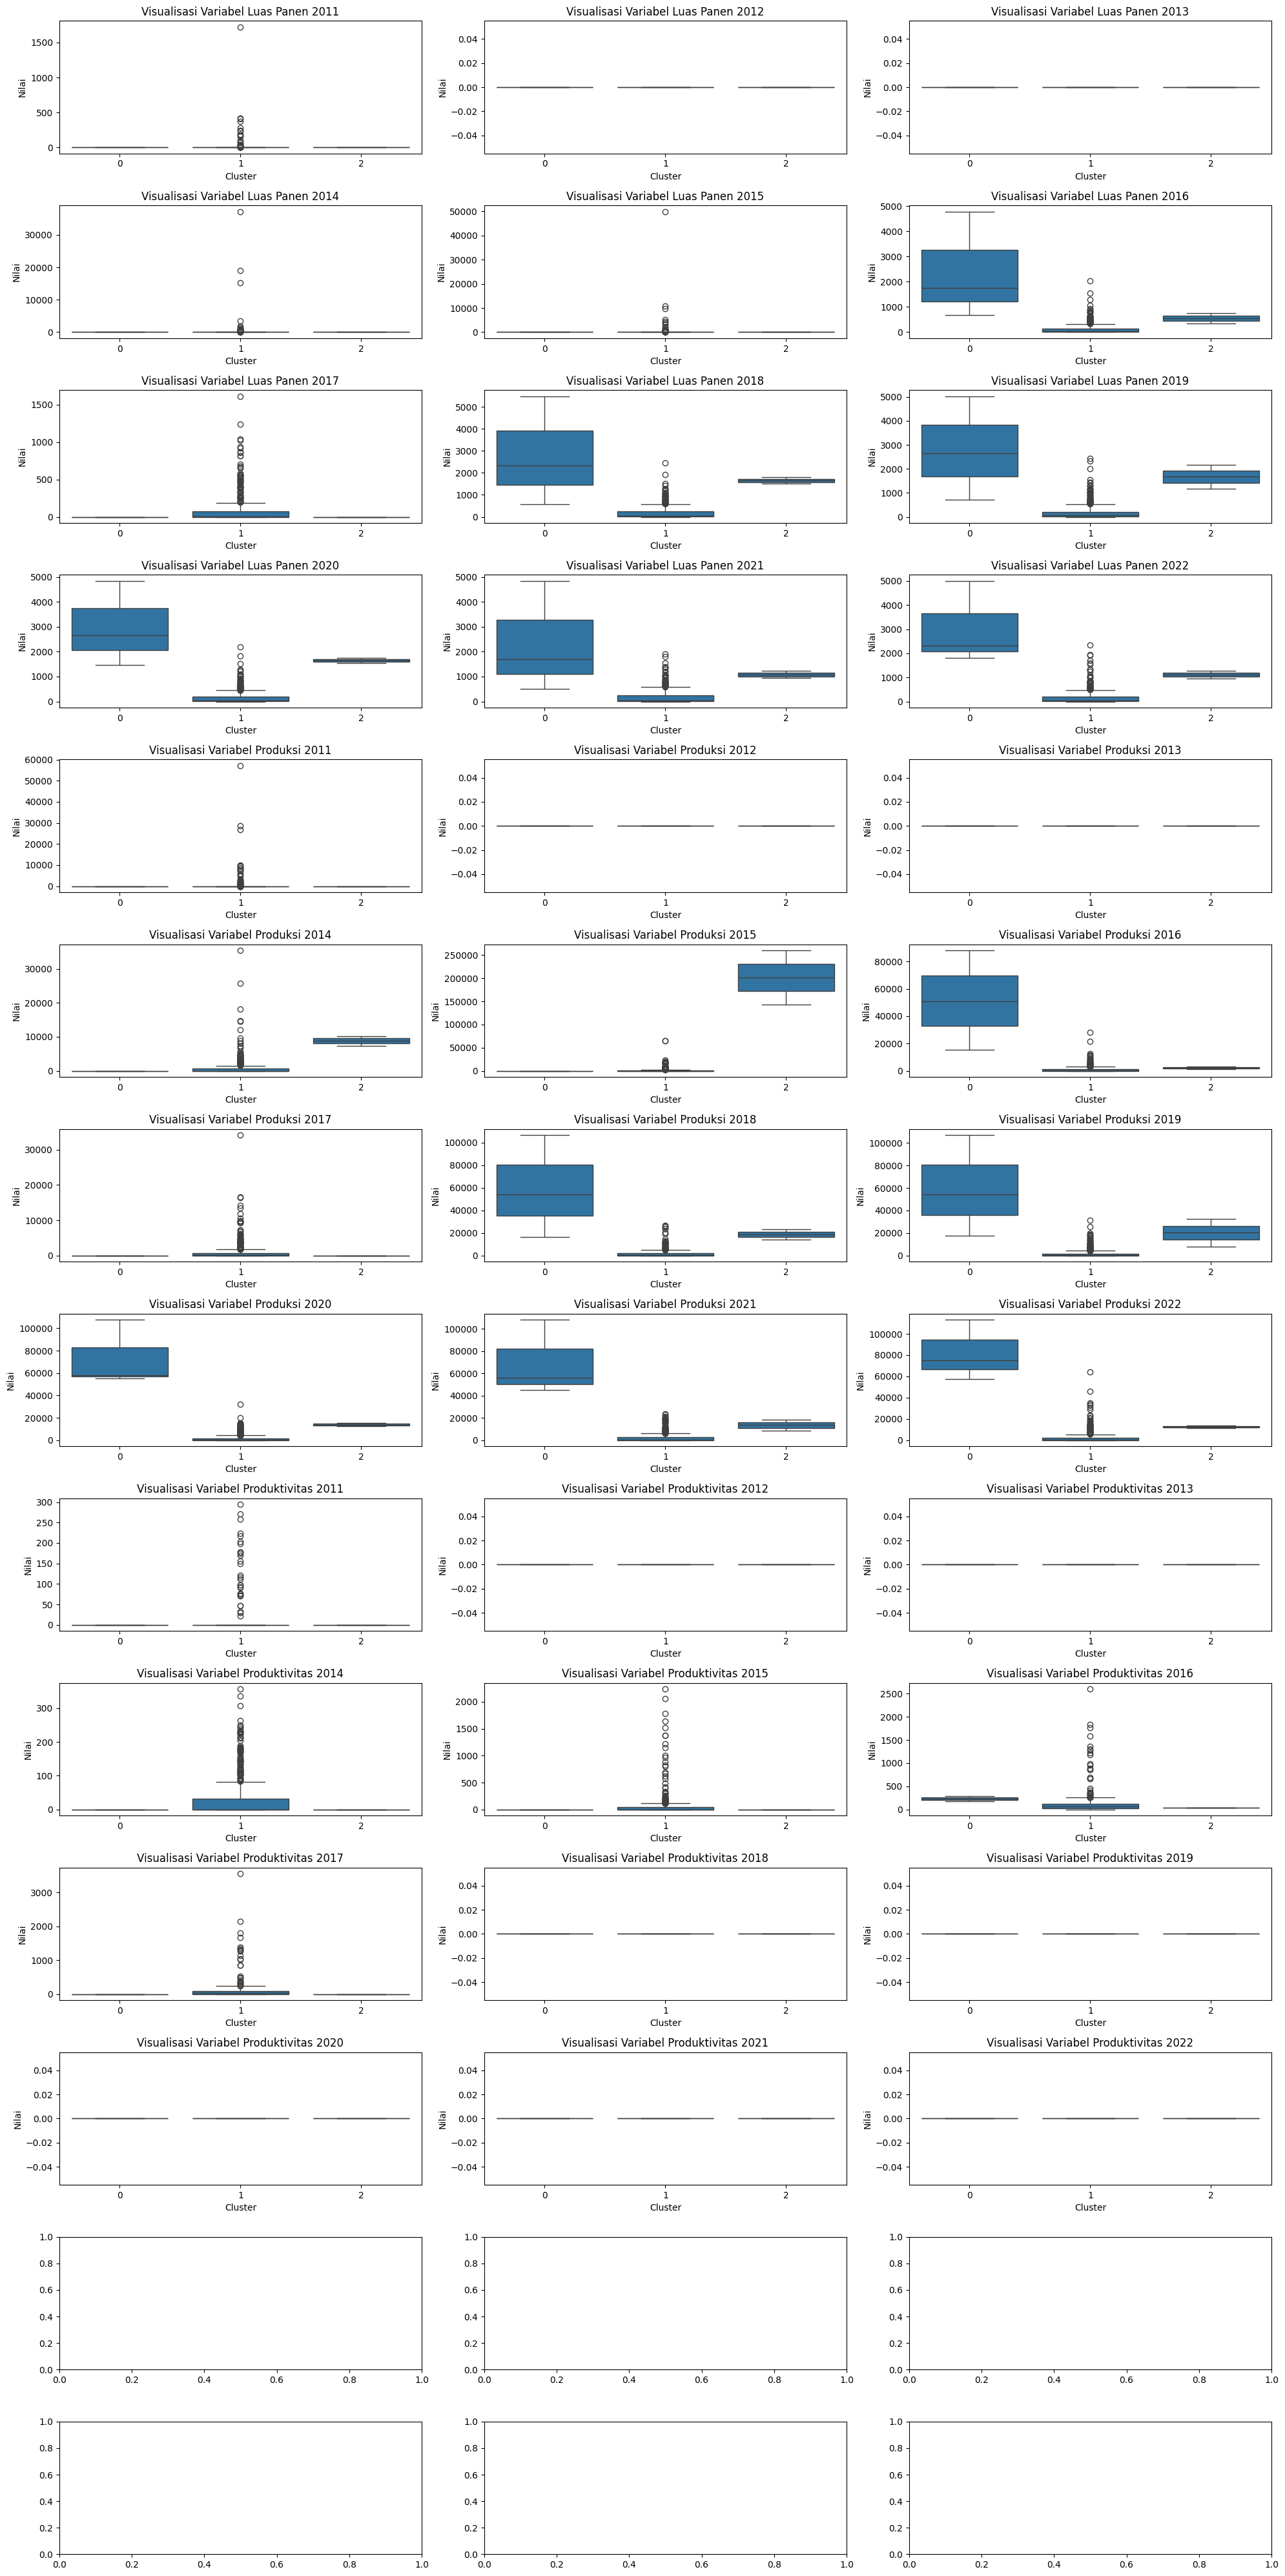

In [ ]:
#Membuat visualisasi pada setiap variabel
# Daftar variabel yang ingin ditampilkan
cols = df.columns
num_cols = len (df.columns)
# Mengatur ukuran plot dan jumlah subplot
fig, axes = plt.subplots (nrows=14, ncols=3, figsize=(20, 40))
axes = axes. flatten ()

for i in range(0, num_cols-1) :

    sns.boxplot (x=df [ 'Cluster' ], y= df [cols[i]], data=df, ax=axes [i] )
    axes[i].set_title (f'Visualisasi Variabel '+ cols [i])
    axes[i].set_xlabel ('Cluster' )
    axes[i].set_ylabel ('Nilai')

plt.tight_layout ()
plt.show ()

In [ ]:
#Visualisasi Pemetaan Menggunakan shp
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

gdf = gpd.read_file("/content/drive/MyDrive/gadm41_IDN_2.shp")

df_reset = df.reset_index ()

kamus_penyesuaian = {
    "Daerah Khusus Ibukota Jakarta": "Jakarta Raya",
    "Kepulauan Bangka Belitung": "Bangka Belitung",
    "Daerah Istimewa Yogyakarta": "Yogyakarta",
}

In [ ]:
df_reset['Nama Kota'] = df_reset['Nama Kota'].replace(kamus_penyesuaian)

data_clustering = df_reset [ ['Nama Kota', 'Cluster' ] ]. rename (columns={ 'Nama Kota': 'provinsi' } )

gdf_provinsi = gdf.dissolve (by='NAME_2')

gdf_provinsi = gdf_provinsi.merge (data_clustering, left_on='NAME_2', right_on='provinsi', how='left' )

color_map = {0: 'red', 1: 'blue', 2: 'green' }
gdf_provinsi['color'] = gdf_provinsi['Cluster'].map(color_map)

gdf_provinsi['color'] = gdf_provinsi['color'] .fillna ('lightgrey' )

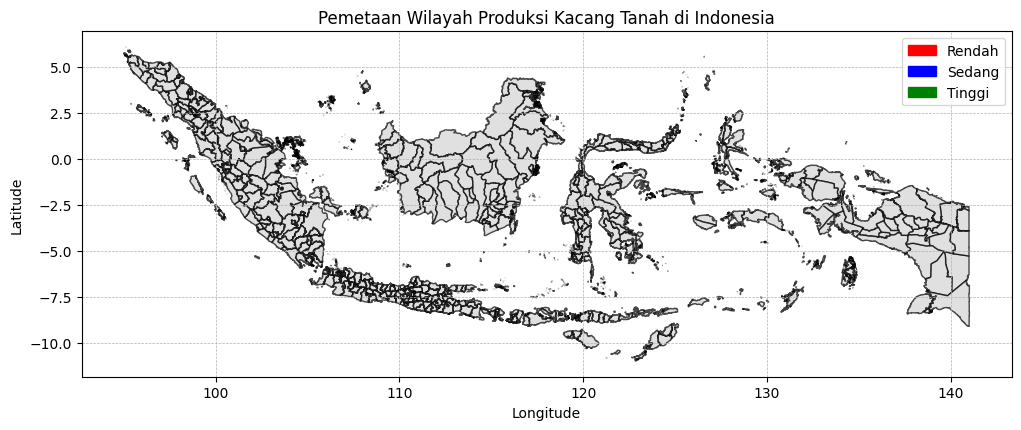

In [ ]:
fig, ax = plt.subplots (1, 1, figsize=(12, 8))
gdf_provinsi.plot (ax=ax, color=gdf_provinsi ['color'], alpha=0.7, edgecolor='black')

ax.grid (True, which='both', linestyle='--', linewidth=0.5)

import matplotlib.patches as mpatches
red_patch = mpatches.Patch (color='red', label='Rendah')
blue_patch = mpatches. Patch (color='blue' , label='Sedang' )
green_patch = mpatches.Patch (color = 'green', label = 'Tinggi' )
plt.legend (handles=[red_patch, blue_patch, green_patch], loc='upper right' )

plt.title ("Pemetaan Wilayah Produksi Kacang Tanah di Indonesia")
plt.xlabel ("Longitude")
plt.ylabel ("Latitude")
plt. show ()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage


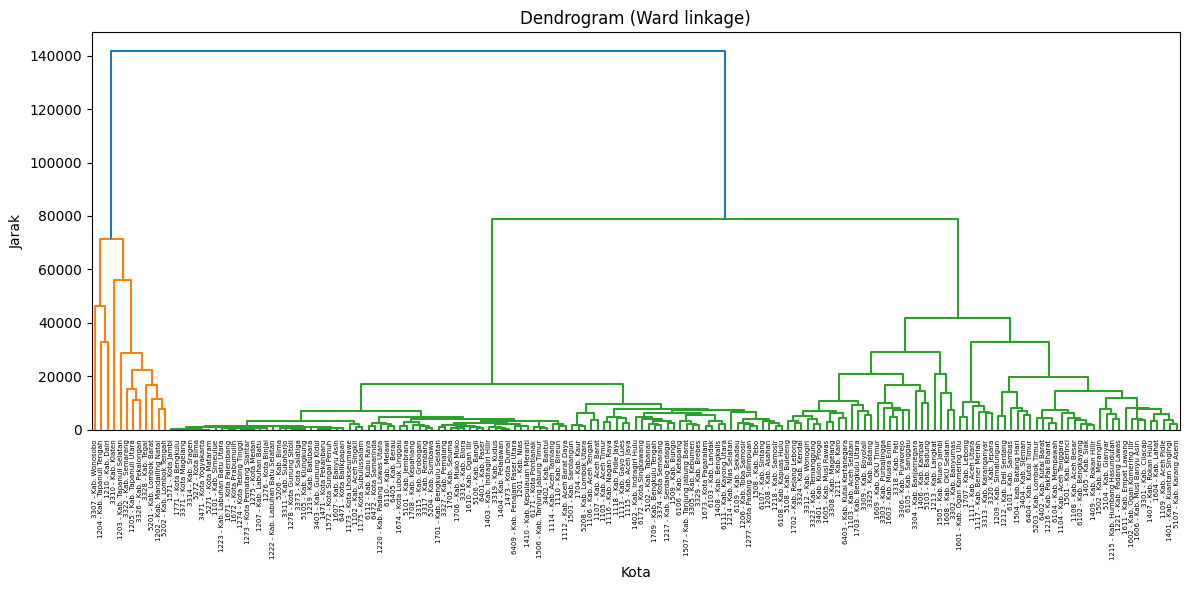

In [ ]:
linked = linkage(X, method='ward')
plt.figure(figsize=(12, 6))
dendrogram(linked, labels=city_names.to_list(), leaf_rotation=90)
plt.title("Dendrogram (Ward linkage)")
plt.xlabel("Kota")
plt.ylabel("Jarak")
plt.tight_layout()
plt.show()


n_clusters=2
Silhouette Score: 0.7158620041763175
Davies-Bouldin Index: 0.90544156217611
Execution Time: 0.0040 detik


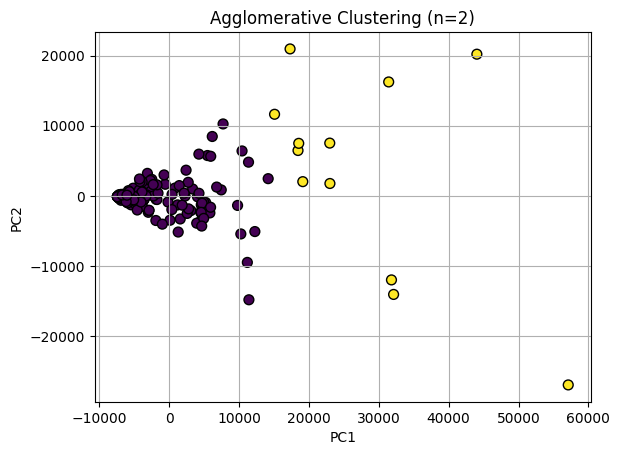

n_clusters=3
Silhouette Score: 0.4223087031719994
Davies-Bouldin Index: 1.117214059306427
Execution Time: 0.0086 detik


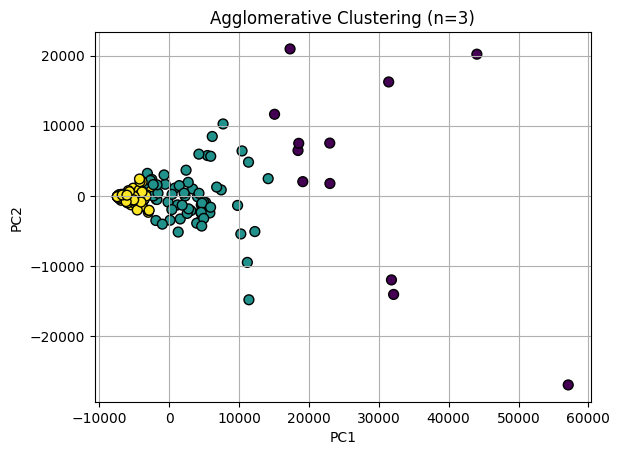

n_clusters=4
Silhouette Score: 0.432908468841935
Davies-Bouldin Index: 1.0785262782177654
Execution Time: 0.0041 detik


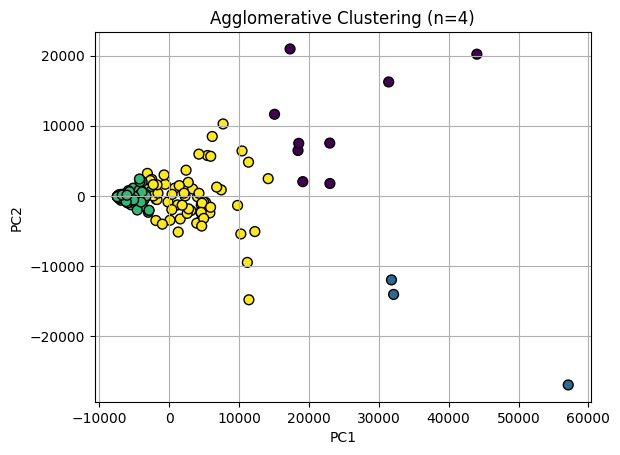

n_clusters=5
Silhouette Score: 0.436227004006206
Davies-Bouldin Index: 0.903093775556069
Execution Time: 0.0039 detik


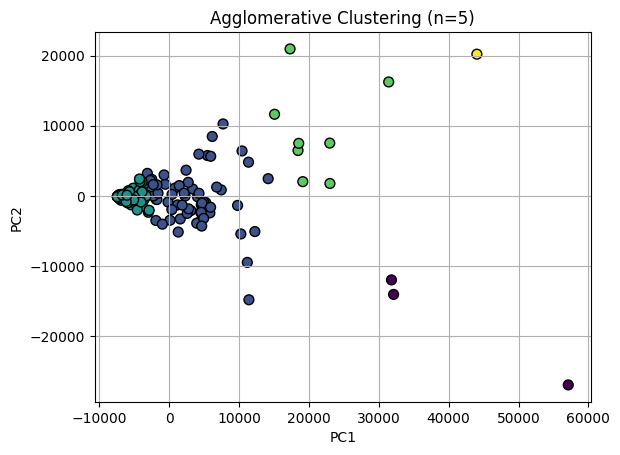

n_clusters=6
Silhouette Score: 0.4365602881506416
Davies-Bouldin Index: 0.7855051250112156
Execution Time: 0.0039 detik


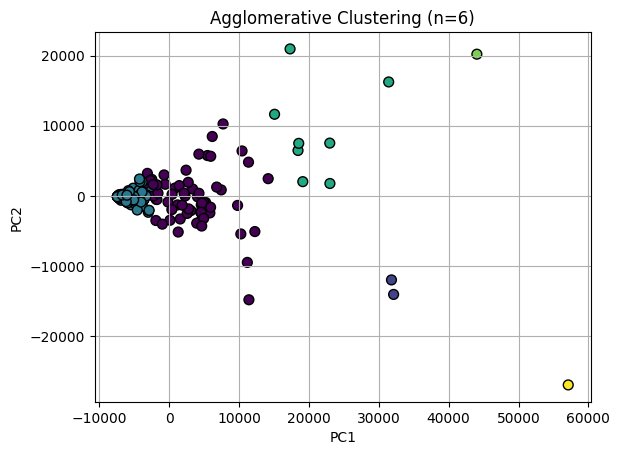

n_clusters=7
Silhouette Score: 0.4039211040972298
Davies-Bouldin Index: 1.035405444453278
Execution Time: 0.0039 detik


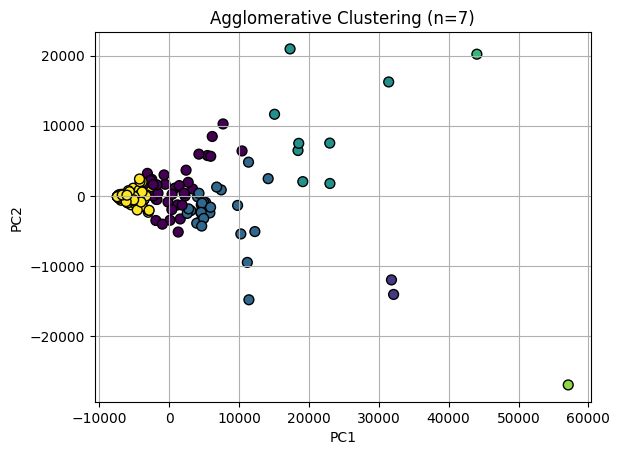

n_clusters=8
Silhouette Score: 0.3799399817996968
Davies-Bouldin Index: 1.006920475190576
Execution Time: 0.0038 detik


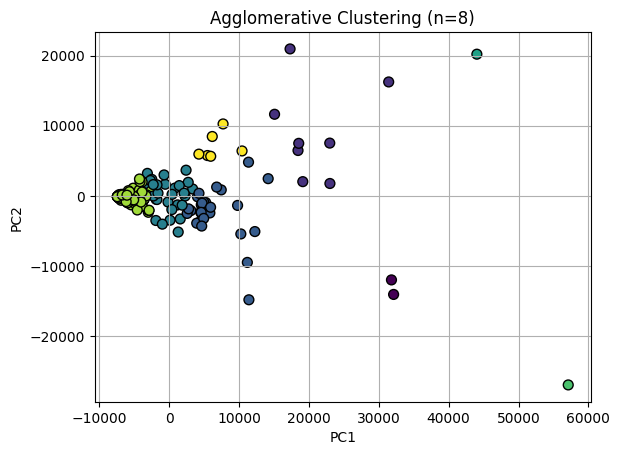

n_clusters=9
Silhouette Score: 0.37926480152709613
Davies-Bouldin Index: 0.8316108144769221
Execution Time: 0.0049 detik


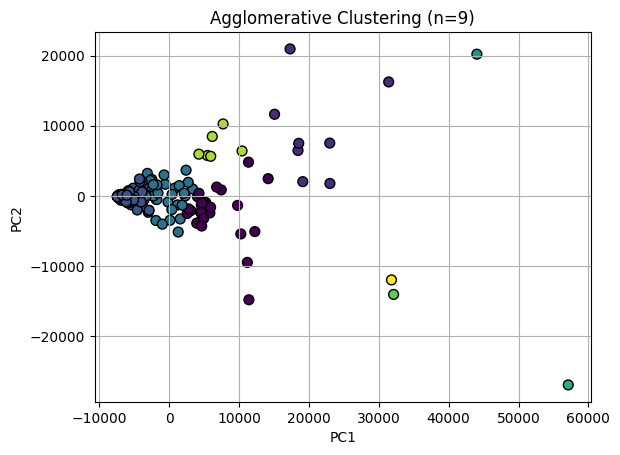

n_clusters=10
Silhouette Score: 0.38684932598786326
Davies-Bouldin Index: 0.8894916812430521
Execution Time: 0.0040 detik


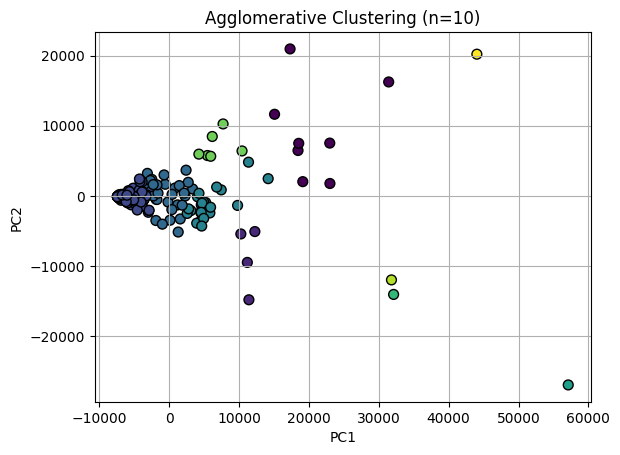

In [ ]:
result_hc = {'Rata-rata Silhouette':[], 'Rata-rata Davies-Bouldin Index':[], 'Waktu Komputasi (detik)':[]}
X_new = X.copy()

for i in range(2, 11):
    start_time = time.time()
    clusterer = AgglomerativeClustering(n_clusters=i)
    cluster_labels = clusterer.fit_predict(X)
    end_time = time.time()

    silhouette_avg = silhouette_score(X, cluster_labels)
    dbi = davies_bouldin_score(X, cluster_labels)
    execution_time = end_time - start_time

    result_hc['Rata-rata Silhouette'].append(silhouette_avg)
    result_hc['Rata-rata Davies-Bouldin Index'].append(dbi)
    result_hc['Waktu Komputasi (detik)'].append(execution_time)

    print(f"n_clusters={i}")
    print(f"Silhouette Score: {silhouette_avg}")
    print(f"Davies-Bouldin Index: {dbi}")
    print(f"Execution Time: {execution_time:.4f} detik")

    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', edgecolor='k', s=50)
    plt.title(f"Agglomerative Clustering (n={i})")
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.grid(True)
    plt.show()


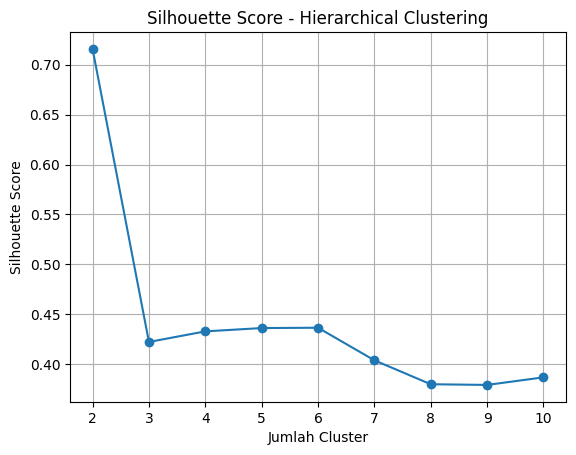

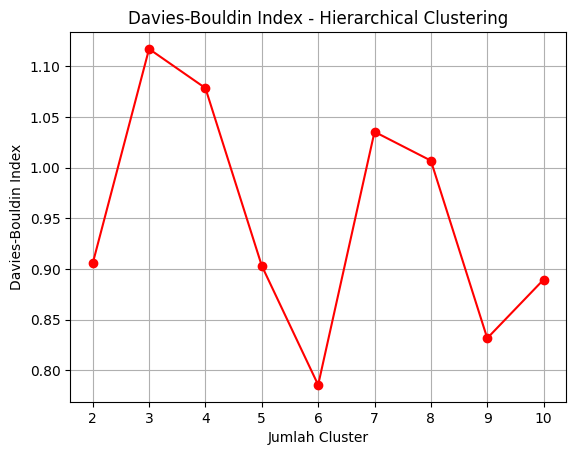

In [ ]:
plt.plot(range(2, 11), result_hc['Rata-rata Silhouette'], marker='o')
plt.title('Silhouette Score - Hierarchical Clustering')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

plt.plot(range(2, 11), result_hc['Rata-rata Davies-Bouldin Index'], marker='o', color='red')
plt.title('Davies-Bouldin Index - Hierarchical Clustering')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Davies-Bouldin Index')
plt.grid(True)
plt.show()
